In [52]:
import sys
import tarfile
import scipy.io
import numpy as np
import pandas as pd
import cv2 as cv
import shutil
import random
import os
from console_progressbar import ProgressBar
from keras.preprocessing.image import ImageDataGenerator


path_base = 'C:/Users/Gustaf/Cars'
names = pd.read_csv(path_base+'/names.csv')
print(os.listdir('C:/Users/Gustaf/Cars'))

['cars_test', 'cars_train', 'devkit', 'names.csv', 'test', 'train', 'train_csv.csv']


In [133]:
def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
def save_train_data(fnames, labels, bboxes):
    src_folder ='C:/Users/Gustaf/Cars/cars_train'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        if i in train_indexes:
            dst_folder = '.\\train\\'
        else:
            dst_folder = '.\\valid\\'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

def save_test_data(fnames, bboxes):
    src_folder = 'C:/Users/Gustaf/Cars/cars_test'
    dst_folder = './test_data'
    num_samples = len(fnames)

    pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
        
def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('C:/Users/Gustaf/Cars/devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)
    


def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('C:/Users/Gustaf/Cars/devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)
    

img_width, img_height = 299, 299

cars_meta = scipy.io.loadmat('C:/Users/Gustaf/Cars/devkit/cars_meta.mat')
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print('Sample class_name: [{}]'.format(class_names[8][0][0]))

ensure_folder('./train')
ensure_folder('./valid')
ensure_folder('./test')

process_train_data()
process_test_data()

class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]
Processing train data...
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
The number of different cars is 196
Save train data |==========================================

In [7]:
# import tensorflow and keras stuff..

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras import layers
from keras import regularizers
from tensorflow.keras.regularizers import l2

In [10]:
# define dirs
train_data_dir =  './train'
validation_data_dir = './valid'

# vars for the generators
img_width, img_height = 25, 25
nb_train_samples = 8144
nb_validation_samples = 8041
epochs = 10
batch_size = 32 # default value, kind of redudand to specify..
n_classes = 196

# define generators 

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 6786 images belonging to 196 classes.


In [8]:
model = Sequential()

# Input layer (Convo)
# Activation function: relu
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(25,25,1)))

# 2nd layer (Convo+pool+batchnorm) 
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(BatchNormalization())

# flatten to feed to fully connected layers..
model.add(layers.Flatten(input_shape=(50,50,1)))

#layer 3 (Dense+batchnorm)
model.add(layers.Dense(196, activation='relu'))
model.add(BatchNormalization())

# Output layer (Dense)
# Activation function: Softmax
model.add(layers.Dense(196, activation='softmax'))

# Compile the model.
# cat_cross_ent is optimal loss function for a categorical network 
# adam is the optimal optimizer for categorical network 
# metrics to eval: accuracy

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the summary of the model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 196)               1254596   
_________________________________________________________________
batch_normalization_1 (Batch (None, 196)              

In [136]:
# create a variable history for later evaluation of the model. 
# set number of steps per epoch to number of samples in training set.
# set number of val steps to number of samples in test set. 
# divide by batch size (32) for full exposure to the sets.

ep_steps = 8144/32
val_steps = 6424/32 

history = model.fit_generator(generator = train_generator, steps_per_epoch= ep_steps, 
                              epochs=20, verbose=1,
                                    validation_data= validation_generator,
                             validation_steps= val_steps) 

Epoch 1/20
255/254 [==============================] - 62s 244ms/step - loss: 5.3518 - accuracy: 0.0172 - val_loss: 5.2065 - val_accuracy: 0.0112
Epoch 2/20
255/254 [==============================] - 27s 105ms/step - loss: 4.9632 - accuracy: 0.0403 - val_loss: 4.7732 - val_accuracy: 0.0588
Epoch 3/20
255/254 [==============================] - 26s 104ms/step - loss: 4.6399 - accuracy: 0.0753 - val_loss: 4.2677 - val_accuracy: 0.1238
Epoch 4/20
255/254 [==============================] - 35s 137ms/step - loss: 4.3313 - accuracy: 0.1116 - val_loss: 3.7624 - val_accuracy: 0.1942
Epoch 5/20
255/254 [==============================] - 54s 212ms/step - loss: 4.0176 - accuracy: 0.1594 - val_loss: 3.3249 - val_accuracy: 0.2791
Epoch 6/20
255/254 [==============================] - 56s 220ms/step - loss: 3.7186 - accuracy: 0.2080 - val_loss: 3.3113 - val_accuracy: 0.2690
Epoch 7/20
255/254 [==============================] - 55s 217ms/step - loss: 3.4084 - accuracy: 0.2607 - val_loss: 2.5987 - val_ac

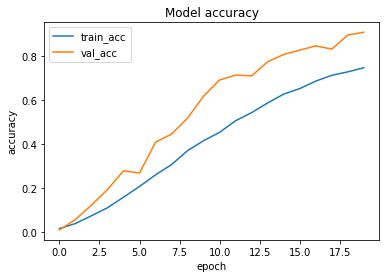

In [138]:
# Graph the accuracy of the model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','loss','val_loss'], loc='upper left')
plt.show()

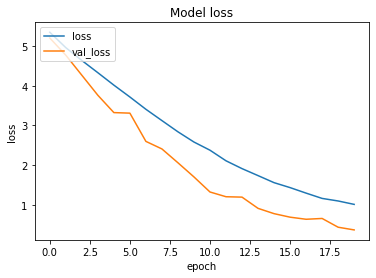

In [139]:
# Graph the loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [141]:
# create model for prediciton and its outcome for random car model.

def predict(model):
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
     # plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image, cmap='gray')

<ipython-input-141-b50043920e2b>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


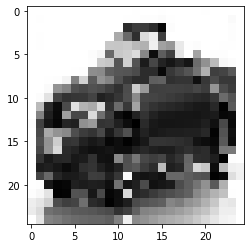

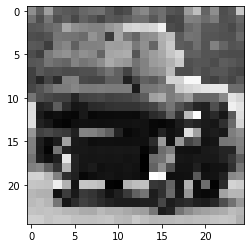

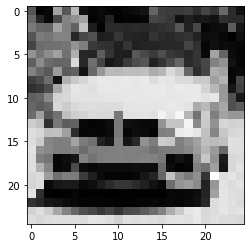

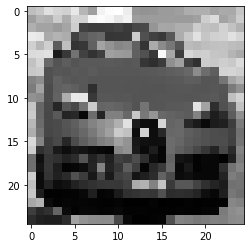

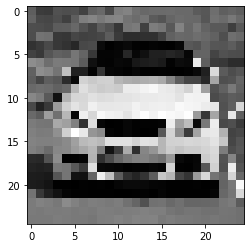

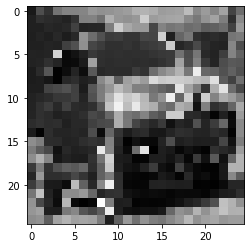

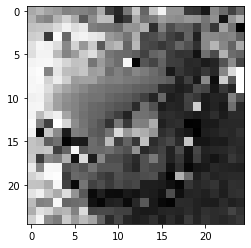

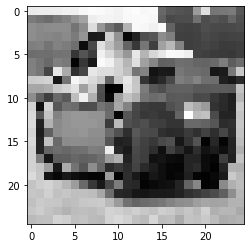

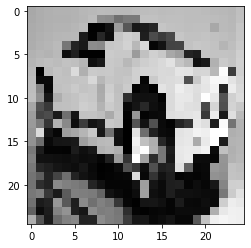

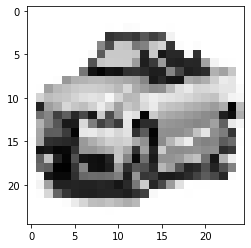

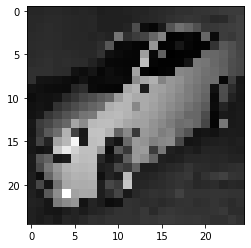

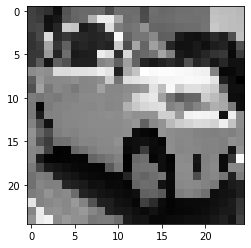

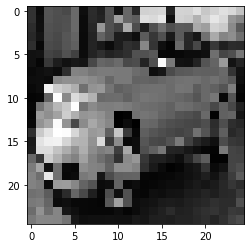

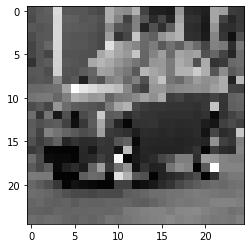

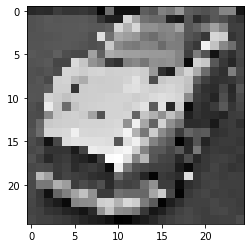

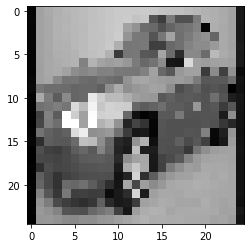

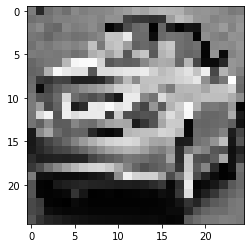

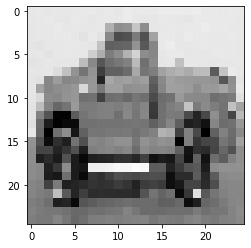

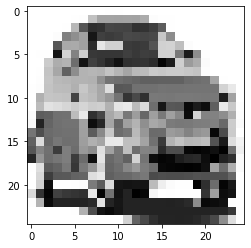

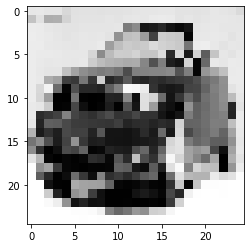

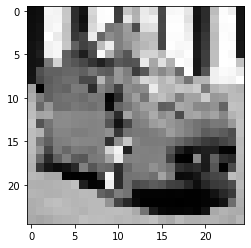

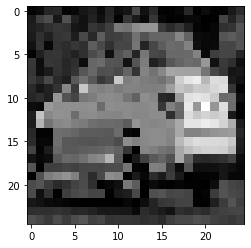

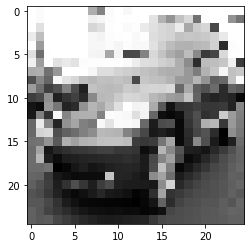

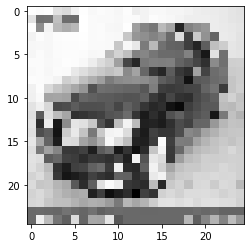

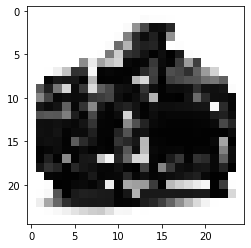

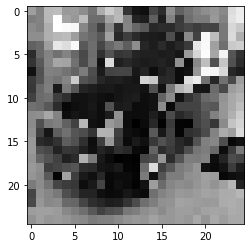

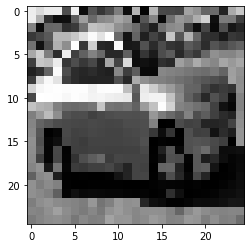

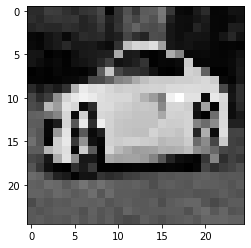

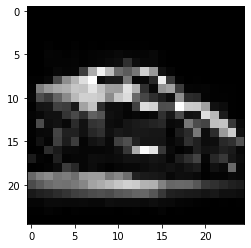

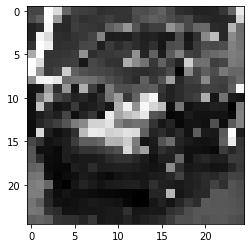

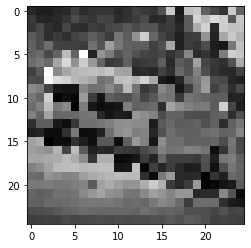

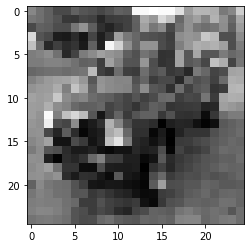

In [142]:
predict(model)

In [43]:
# Try the model on val set..
from sklearn.metrics import confusion_matrix

pred= model.predict_generator(validation_generator, np.ceil(6424/32))
predicted_class_indices=np.argmax(pred,axis=1)
labels=(validation_generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]

#print(predicted_class_indices)
#print(labels)
print(predictions)

['0131', '0023', '0023', '0056', '0023', '0023', '0131', '0131', '0131', '0131', '0131', '0056', '0131', '0131', '0023', '0023', '0131', '0131', '0023', '0131', '0023', '0056', '0131', '0023', '0131', '0056', '0131', '0131', '0131', '0023', '0131', '0023', '0131', '0140', '0023', '0131', '0131', '0056', '0023', '0023', '0131', '0023', '0131', '0036', '0056', '0131', '0131', '0131', '0131', '0023', '0056', '0023', '0131', '0011', '0131', '0131', '0056', '0131', '0056', '0011', '0023', '0131', '0131', '0131', '0056', '0023', '0131', '0056', '0023', '0131', '0056', '0011', '0131', '0056', '0131', '0023', '0023', '0131', '0056', '0131', '0131', '0131', '0056', '0023', '0023', '0011', '0011', '0131', '0056', '0023', '0131', '0023', '0023', '0131', '0131', '0023', '0131', '0056', '0131', '0131', '0023', '0131', '0011', '0056', '0023', '0023', '0056', '0023', '0131', '0011', '0023', '0023', '0056', '0056', '0056', '0023', '0131', '0056', '0131', '0023', '0131', '0131', '0023', '0131', '0023',